In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
from os.path import join

In [19]:
abalone_colums = list()
with open('C:/Users/user/Documents/github/abalone_attributes.txt','rt') as f:
    for line in f:
        abalone_colums.append(line.strip())
print(abalone_colums)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [36]:
data = pd.read_csv('C:/Users/user/Documents/github/abalone.txt',header=None,names =abalone_colums) # 전복데이터
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
label = data['Sex']
del data['Sex']

In [38]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [39]:
data.describe() # 수치형 자료들의 기술통계

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [35]:
# Scaling
# data = (data - np.mean(data))/(np.max(data)-np.min(data))
# data

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.093233,-0.072069,-0.039395,-0.111472,-0.090698,-0.104797,-0.088521,0.180940
1,-0.235124,-0.240137,-0.043820,-0.213650,-0.174760,-0.173922,-0.168242,-0.104774
2,0.008119,0.020368,-0.003997,-0.053743,-0.069178,-0.051473,-0.028730,-0.033346
3,-0.113503,-0.072069,-0.012846,-0.110764,-0.096750,-0.087681,-0.083538,0.002368
4,-0.262151,-0.256943,-0.052669,-0.220911,-0.181485,-0.185772,-0.183190,-0.104774
...,...,...,...,...,...,...,...,...
4172,0.055416,0.070788,0.022552,0.020633,0.007150,0.076901,0.010134,0.038083
4173,0.089200,0.053981,-0.003997,0.048613,0.053552,0.044643,0.021594,0.002368
4174,0.102713,0.112805,0.057950,0.122988,0.111723,0.140759,0.068928,-0.033346
4175,0.136497,0.129611,0.009278,0.094124,0.115422,0.105868,0.056970,0.002368


In [40]:
from sklearn import preprocessing

In [42]:
mMscaler = sklearn.preprocessing.MinMaxScaler()
# mMscaler.fit(data)
# mScaled_data = mMscaler.transform(data)
mScaled_data = mMscaler.fit_transform(data)
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [43]:
mScaled_data = pd.DataFrame(mScaled_data,columns=data.columns)
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [46]:
from sklearn.preprocessing import StandardScaler
sdScaler = StandardScaler()
sdscaled_data = sdScaler.fit_transform(data)
sdscaled_data = pd.DataFrame(sdscaled_data,columns=data.columns)
sdscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [48]:
# Sampling
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Defaulting to user installation because normal site-packages is not writeable


In [49]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

oversampled_data, oversampled_label = ros.fit_resample(data,label)
undersampled_data, undersampled_label = rus.fit_resample(data,label)

In [53]:
print(f'원본 데이터의 클래스 비율: {pd.get_dummies(label).sum()}')
print(f'오버 샘플 데이터의 클래스 비율: {pd.get_dummies(oversampled_label).sum()}')
print(f'언더 샘플 데이터의 클래스 비율: {pd.get_dummies(undersampled_label).sum()}')

원본 데이터의 클래스 비율: F    1307
I    1342
M    1528
dtype: int64
오버 샘플 데이터의 클래스 비율: F    1528
I    1528
M    1528
dtype: int64
언더 샘플 데이터의 클래스 비율: F    1307
I    1307
M    1307
dtype: int64


In [54]:
from sklearn.datasets import make_classification

In [57]:
# 임의의 샘플 생성
data,label = make_classification(n_samples=1000,n_features=2,n_informative=2,n_repeated=0,n_classes=3,n_clusters_per_class=1,n_redundant=0,weights=[0.05,0.15,0.8],random_state=2022)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


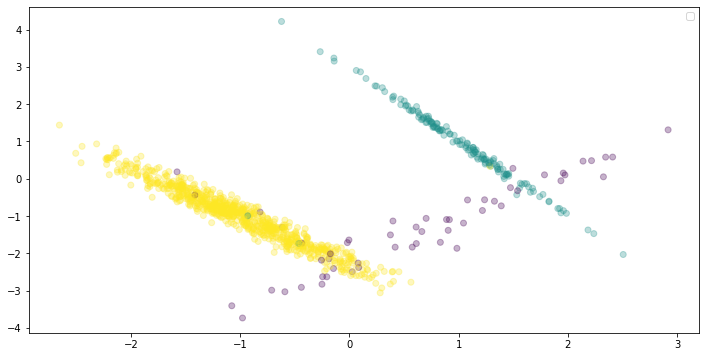

In [60]:
fig = plt.figure(figsize=(12,6))
plt.scatter(data[:,0],data[:,1],c=label,alpha=0.3)
plt.legend()
plt.show()

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smoted_data,smoted_label = smote.fit_resample(data,label)

In [62]:
print(f'원본 데이터의 클래스 비율: {pd.get_dummies(label).sum()}')
print(f'smote 데이터의 클래스 비율: {pd.get_dummies(smoted_label).sum()}')

원본 데이터의 클래스 비율: 0     54
1    152
2    794
dtype: int64
smote 데이터의 클래스 비율: 0    794
1    794
2    794
dtype: int64


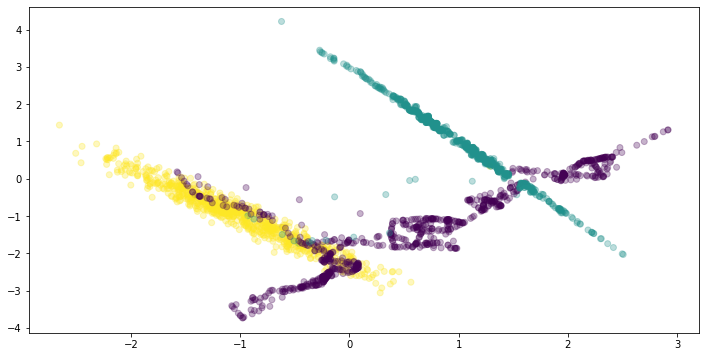

In [64]:
fig = plt.figure(figsize=(12,6))
plt.scatter(smoted_data[:,0],smoted_data[:,1],c=smoted_label,alpha=0.3)
plt.show()

In [1]:
# 차원의 축소

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
data = digits.data
label = digits.target

In [5]:
print(data.shape)
print(label.shape)

(1797, 64)
(1797,)


Label: 0


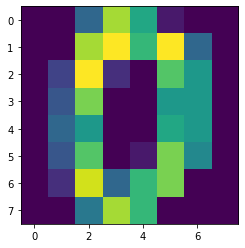

In [10]:
import matplotlib.pyplot as plt
plt.imshow(data[0].reshape((8,8)))
print(f'Label: {label[0]}')

In [11]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2) # 2개의 차원으로 축소
new_data = pca.fit_transform(data)

In [15]:
new_data.shape

(1797, 2)

In [16]:
new_data[0]

array([-1.25946726, 21.27488886])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


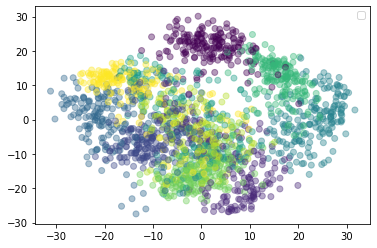

In [18]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,alpha=0.4)
plt.legend()
plt.show()

In [27]:
import pandas as pd
data = pd.read_csv('C:/Users/user/Documents/github/abalone.txt',header=None,names=abalone_colums)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
label = data['Sex']
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_label = le.fit_transform(label)
print(label_encoded_label[:5])

[2 2 0 2 1]


In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # 필요한 것은 array므로 sparse 옵션에 False 기입
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1))) # numpy 행렬을 입력해야 하므로 pd.dataframe이나 series의 values를 사용
# 벡터 입력을 허용안하므로 reshape로 Matrix로 변환필요
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])